<h1><b>$$
\rm Chapter\; : \; 3 - Classification
$$</b></h1>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# **Get the Data**

For this tutorial, we are using MNIST dataset.

In [2]:
train_df = pd.read_csv('https://pjreddie.com/media/files/mnist_train.csv', header=None)
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('https://pjreddie.com/media/files/mnist_test.csv', header=None)
test_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


In [6]:
train_df[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [7]:
test_df[0].value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: 0, dtype: int64

In [8]:
train_feat = np.array(train_df.iloc[:, 1:])
train_label = np.array(train_df.iloc[:, 0])

test_feat = np.array(test_df.iloc[:, 1:])
test_label = np.array(test_df.iloc[:, 0])

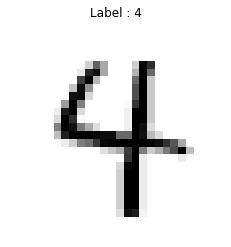

In [9]:
num = np.random.randint(0, 60000)

random_digit = train_feat[num]
random_label = train_label[num]

plt.imshow(random_digit.reshape(28, 28), cmap="binary")
plt.title(f"Label : {random_label}")
plt.axis("off")
plt.show()

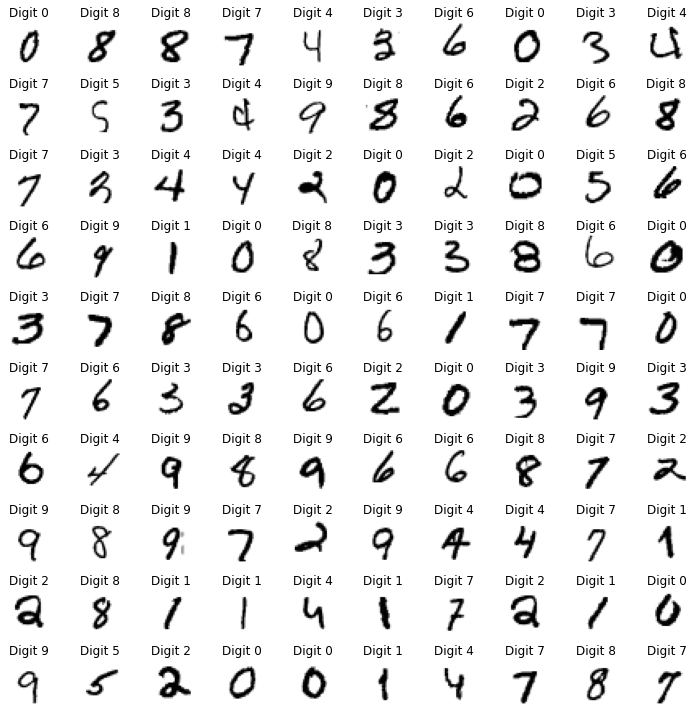

In [10]:
some_images = np.random.randint(0, train_feat.shape[0], size=(10,10))

fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        x = train_feat[some_images[i, j]]
        axs[i, j].imshow(x.reshape(28, 28), cmap="binary")
        axs[i, j].set_title(f"Digit {train_label[some_images[i, j]]}")
        axs[i, j].axis("off")
plt.tight_layout()
plt.show()

# **Binary Classification: Classify 0 and non-0**

In [11]:
# Reformat Labels 0 -> 1, non-0 -> 0

train_0_label = train_label.copy().astype(bool)
train_0_label = (~train_0_label).astype(int)
train_0_label.shape, train_0_label.sum()

((60000,), 5923)

## First check 5-fold cross-validation score based on SGDClassifier model

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score


model = SGDClassifier(random_state=42)
model.fit(train_feat, train_0_label)

cvs = cross_val_score(model, train_feat, train_0_label, cv=5, scoring='accuracy')
cvs

array([0.98925   , 0.98825   , 0.989     , 0.98725   , 0.98858333])

The score is too high, if we use the dumbest model, that always results non-0, then also we will get > 90% accuracy as there is too many non-0 than 0 class values.

In [13]:
# Build a custom sklearn model, which will return constant result 






In [14]:
# Evaluate our new model using cross validation





## Calculate Confusion Matrix

In [15]:
# cross_val_predict is similar to cross_val_score, but in cross_val_predict,
# it outputs the predictions at different stages rathar than the final score.

from sklearn.model_selection import cross_val_predict

cvp = cross_val_predict(model, train_feat, train_0_label, cv=5)
cvp

array([0, 1, 0, ..., 0, 0, 0])

In [16]:
# Doing the same thing but using sklearn library function

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_0_label, cvp)
cm

array([[53729,   348],
       [  344,  5579]])

## Plot Precision - Recall Curve

First to get the precision - recall value, we need the `decision_score` used by the `SGDClassifier` function.

In [17]:
# if we set method="decision_function" in cross_val_predict function,
# it will return decision score against each instance

cv_decision_score = cross_val_predict(model, train_feat, train_0_label, cv=5,
                                      method="decision_function")
print(cv_decision_score.shape)
cv_decision_score

(60000,)


array([-43499.12944537,  53016.5902148 , -61520.03020063, ...,
       -35551.44941238, -33891.00743351, -17821.27241524])

In [18]:
from sklearn.metrics import precision_recall_curve

# Here we will use the "cv_decision_score" we calculated earlier

precision, recall, threshold = precision_recall_curve(train_0_label, cv_decision_score)
precision.shape, recall.shape, threshold.shape

((51660,), (51660,), (51659,))

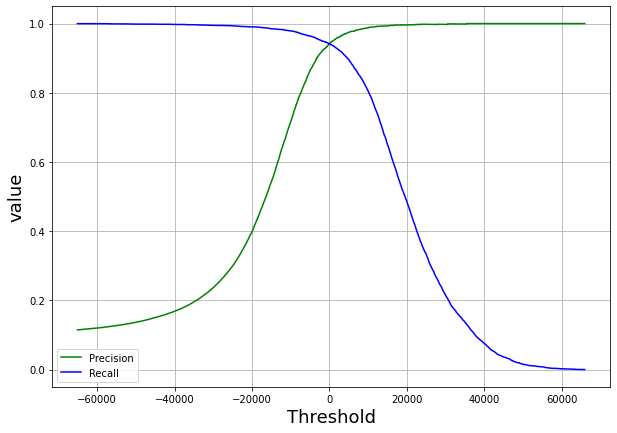

In [19]:
plt.figure(figsize=(10, 7))
plt.plot(threshold, precision[:-1], 'g', label="Precision")
plt.plot(threshold, recall[:-1], 'b', label="Recall")
plt.xlabel("Threshold", fontdict={'size':18})
plt.ylabel("value", fontdict={'size':18})
plt.legend()
plt.grid()
plt.show()

## Precision Vs. Recall Curve

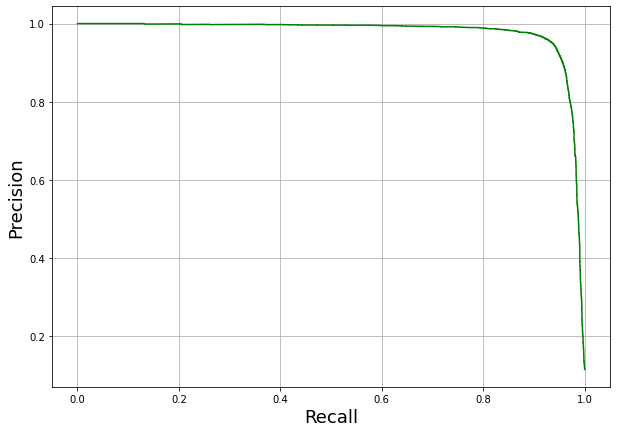

In [20]:
plt.figure(figsize=(10, 7))
plt.plot(recall, precision, 'g')
plt.xlabel("Recall", fontdict={'size':18})
plt.ylabel("Precision", fontdict={'size':18})
plt.grid()
plt.show()

## ROC Curve (Receiver Operating Characteristic Curve)

ROC is -> TPR vs FPR

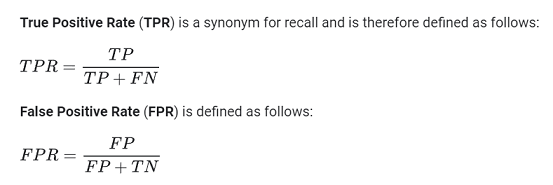

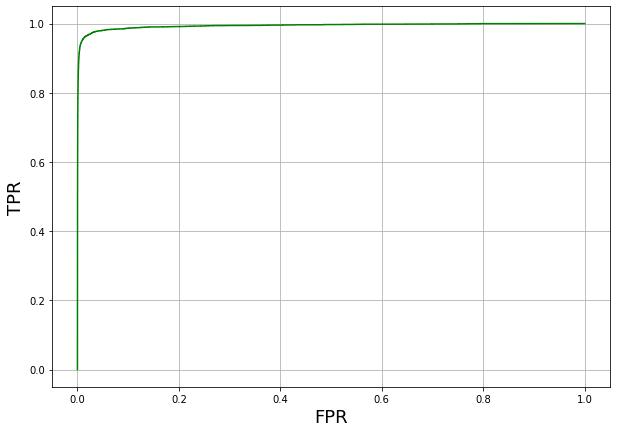

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_0_label, cv_decision_score)


plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, 'g')
plt.xlabel("FPR", fontdict={'size':18})
plt.ylabel("TPR", fontdict={'size':18})
plt.grid()
plt.show()

# **Multi-Class Classification**

## Experiment with various models

In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

model = SGDClassifier(random_state=42)
cvs = cross_val_score(model, train_feat, train_label, cv=5, scoring="accuracy")
cvs

array([0.88083333, 0.88325   , 0.88116667, 0.86625   , 0.8875    ])

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train_feat, train_label)
train_feat_s = sc.transform(train_feat)

In [ ]:
model = SGDClassifier(random_state=42)
cvs = cross_val_score(model, train_feat_s, train_label, cv=5, scoring="accuracy")
cvs

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
cvs = cross_val_score(forest, train_feat_s, train_label, cv=5, scoring="accuracy")
cvs

## Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

cv_pred = cross_val_predict(forest, train_feat_s, train_label, cv=5)
cv_pred

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(train_label, cv_pred)
conf_mat

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, cmap="hot", fmt='g')
plt.show()

In [ ]:
np.fill_diagonal(conf_mat, 0)

plt.subplots(figsize=(10, 7))
sns.heatmap(conf_mat, annot=False, cmap="gray", fmt='g')
plt.show()

In [ ]:
error_mask = (cv_pred - train_label).astype(bool)
a = np.arange(cv_pred.shape[0])

some_errors = np.random.choice(a[error_mask], size=(10, 10))

fig, axs = plt.subplots(10, 10, figsize=(12, 12))
for i in range(10):
    for j in range(10):
        index = some_errors[i, j]
        x = train_feat[index]
        axs[i, j].imshow(x.reshape(28, 28), cmap="binary")
        axs[i, j].set_title(f"Actual : {train_label[index]}\npredict : {cv_pred[index]}")
        axs[i, j].axis("off")
plt.tight_layout()
plt.show()

# **Multi-Label Classification**

In [ ]:
larger = (train_label >= 7).astype(int).reshape(-1, 1)
even = (train_label % 2 == 0).astype(int).reshape(-1, 1)

train_label_multi = np.concatenate((larger, even), axis=1)
train_label_multi.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_feat, train_label_multi)

In [ ]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(knn, train_feat, train_label_multi, cv=5)
cvs